In [ ]:
from google.colab import files

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel ("/content/drive/MyDrive/MLAssignment/Insurance_Updated.xlsx")

**Summarize Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_days             1000 non-null   int64  
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
# List of features to drop
features_to_drop = [
    'policy_state',
    'policy_csl',
    'insured_sex',
    'insured_education_level',
    'insured_occupation',
    'insured_hobbies',
    'insured_relationship',
    'incident_type',
    'collision_type',
    'incident_severity',
    'authorities_contacted',
    'incident_state',
    'incident_city',
    'incident_location',
    'property_damage',
    'police_report_available',
    'auto_make',
    'auto_model',
    '_c39'
]

# Drop the specified features from the dataframe
df.drop(columns=features_to_drop, inplace=True)

# Now df contains the dataset with the specified features dropped



In [ ]:
# Encoding fraud_reported(dependent variable column)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.fraud_reported)
df['fraud_reported'] = le.transform(df.fraud_reported)

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier


# # Selecting features and target from the DataFrame
# selected_features = ['months_as_customer', 'age', 'policy_number', 'policy_bind_days',
#                      'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
#                      'insured_zip', 'capital-gains', 'capital-loss', 'incident_days',
#                      'incident_hour_of_the_day', 'number_of_vehicles_involved',
#                      'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
#                      'auto_year', 'fraud_reported']  # Remaining variables

# X = df[selected_features]
# y = df['fraud_reported']  # Assuming 'fraud_reported' is the target column

# # Splitting the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42)

# # Fitting a random forest classifier
# forest = RandomForestClassifier(random_state=0)
# forest.fit(X_train, y_train)

# # Computing feature importances
# feature_importances = pd.Series(forest.feature_importances_, index=X.columns)

# # Sorting feature importances in descending order
# feature_importances_sorted = feature_importances.sort_values(ascending=False)

# # Printing feature importances
# print("Feature importances:")
# print(feature_importances_sorted)


In [ ]:
# List of features to drop based as they have less feature importance
features_to_drop = ['umbrella_limit', 'number_of_vehicles_involved', 'policy_deductable']

# Drop specified features from the DataFrame
df.drop(columns=features_to_drop, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   months_as_customer        1000 non-null   int64  
 1   age                       1000 non-null   int64  
 2   policy_number             1000 non-null   int64  
 3   policy_bind_days          1000 non-null   int64  
 4   policy_annual_premium     1000 non-null   float64
 5   insured_zip               1000 non-null   int64  
 6   capital-gains             1000 non-null   int64  
 7   capital-loss              1000 non-null   int64  
 8   incident_days             1000 non-null   int64  
 9   incident_hour_of_the_day  1000 non-null   int64  
 10  bodily_injuries           1000 non-null   int64  
 11  witnesses                 1000 non-null   int64  
 12  total_claim_amount        1000 non-null   int64  
 13  injury_claim              1000 non-null   int64  
 14  property_

In [ ]:
from scipy import stats

# Assume df is your DataFrame

# Calculate Z-score for each data point
z_scores = stats.zscore(df)

# Define threshold for outliers
threshold = 3  # Can be adjusted based on the level of sensitivity desired

# Find outliers
outliers = df[(z_scores > threshold).any(axis=1)]


In [ ]:
print("Outliers detected using Z-score method:")
print(outliers)


Outliers detected using Z-score method:
     months_as_customer  age  policy_number  policy_bind_days  \
229                 154   37         241562              5185   
500                   1   29         357949              6530   

     policy_annual_premium  insured_zip  capital-gains  capital-loss  \
229                2047.59       439269              0        -67800   
500                 854.58       612826          52200             0   

     incident_days  incident_hour_of_the_day  bodily_injuries  witnesses  \
229           3378                         2                0          3   
500           3386                        15                2          3   

     total_claim_amount  injury_claim  property_claim  vehicle_claim  \
229               79530         14460            7230          57840   
500               86790          7890           23670          55230   

     auto_year  fraud_reported  
229       2000               0  
500       2003               0  


In [ ]:
df = df[(z_scores <= threshold).all(axis=1)]
#remove outliers

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.fraud_reported == 0]
df_minority = df[df.fraud_reported == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=1234) # for reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.fraud_reported.value_counts()
df = df_upsampled

In [ ]:
#df after removing outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1502 entries, 2 to 135
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   months_as_customer        1502 non-null   int64  
 1   age                       1502 non-null   int64  
 2   policy_number             1502 non-null   int64  
 3   policy_bind_days          1502 non-null   int64  
 4   policy_annual_premium     1502 non-null   float64
 5   insured_zip               1502 non-null   int64  
 6   capital-gains             1502 non-null   int64  
 7   capital-loss              1502 non-null   int64  
 8   incident_days             1502 non-null   int64  
 9   incident_hour_of_the_day  1502 non-null   int64  
 10  bodily_injuries           1502 non-null   int64  
 11  witnesses                 1502 non-null   int64  
 12  total_claim_amount        1502 non-null   int64  
 13  injury_claim              1502 non-null   int64  
 14  property_claim

# **Random Forest**

In [ ]:
#implementing Random Forest Classifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X and y are defined as follows:
X = df.iloc[:, 0:17]  # Features
y = df.iloc[:, 17]    # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9003322259136213


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9003322259136213
Precision: 0.9154929577464789
Recall: 0.8783783783783784
F1 Score: 0.896551724137931
ROC AUC Score: 0.9457472178060412


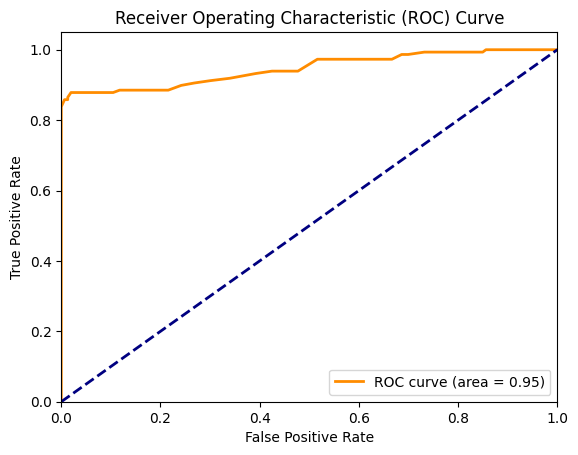

Precision: 0.9154929577464789
Recall (Sensitivity): 0.8783783783783784
F1 Score: 0.896551724137931
ROC AUC Score: 0.9457472178060412


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_pred and y_test are the predicted and actual labels, respectively
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculating ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

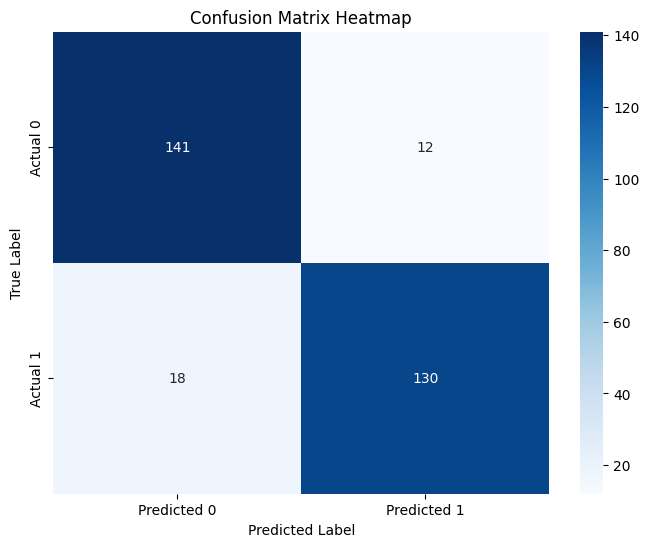

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are defined
conf_matrix = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to DataFrame for easier visualization
conf_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Create heatmap
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(conf_df, annot=True, fmt="d", cmap="Blues")
heatmap.set_title('Confusion Matrix Heatmap')
heatmap.set_xlabel('Predicted Label')
heatmap.set_ylabel('True Label')
plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(df.drop('OBE', axis=1), df['OBE'], test_size=0.3)

In [ ]:
X=df.iloc[:,0:17]
y=df.iloc[:,17]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1502 entries, 2 to 135
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   months_as_customer        1502 non-null   int64  
 1   age                       1502 non-null   int64  
 2   policy_number             1502 non-null   int64  
 3   policy_bind_days          1502 non-null   int64  
 4   policy_annual_premium     1502 non-null   float64
 5   insured_zip               1502 non-null   int64  
 6   capital-gains             1502 non-null   int64  
 7   capital-loss              1502 non-null   int64  
 8   incident_days             1502 non-null   int64  
 9   incident_hour_of_the_day  1502 non-null   int64  
 10  bodily_injuries           1502 non-null   int64  
 11  witnesses                 1502 non-null   int64  
 12  total_claim_amount        1502 non-null   int64  
 13  injury_claim              1502 non-null   int64  
 14  property_claim

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [ ]:
lg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=lg.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,

In [ ]:
from sklearn import metrics

In [ ]:
cf=metrics.confusion_matrix(y_test,y_pred)

In [ ]:
cf

array([[117, 110],
       [ 78, 146]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.5831485587583148

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Replace y_pred with your predicted labels and y_true with the actual labels

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall (Sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC:", roc_auc)

Accuracy: 0.5831485587583148
Precision: 0.5703125
Recall: 0.6517857142857143
F1-score: 0.6083333333333333
ROC-AUC: 0.5836021082441788
